In [200]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [201]:
df = pd.read_csv('/content/Ds_Data.csv')
df.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [202]:
df.shape

(12684, 25)

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   coupon                12684 non-null  object
 5   expiration            12684 non-null  object
 6   gender                12684 non-null  object
 7   age                   12684 non-null  object
 8   maritalStatus         12684 non-null  object
 9   has_children          12684 non-null  int64 
 10  education             12684 non-null  object
 11  occupation            12684 non-null  object
 12  income                12684 non-null  object
 13  car                   108 non-null    object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [204]:
df.isnull().sum()

,0
destination,0
passanger,0
weather,0
temperature,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0
has_children,0


# Handling Missing Values

In [205]:
df['car'].value_counts()

,count
car,
Scooter and motorcycle,22
Mazda5,22
do not drive,22
crossover,21
Car that is too old to install Onstar :D,21


In [206]:
# imputing missing values of car column
df.drop('car', axis=1, inplace=True)

In [207]:
df['expiration'].value_counts()

,count
expiration,
1d,7091
2h,5593


In [208]:
df['expiration'] = df['expiration'].apply(lambda x: 24 if x == '1d' else 2)
expiration_time_in_hr = df['expiration'].astype(int)

In [209]:
df['expiration_time_in_hr'] = df['expiration'].astype(int)

In [210]:
df['expiration_time_in_hr'].dtype
df.drop('expiration', axis=1, inplace=True)

In [211]:
df.groupby("age")["Bar"].value_counts(normalize=True)*100

age      Bar  
21       never    32.074046
         less1    28.031734
         1~3      24.933887
         4~8      10.804685
         gt8       4.155648
26       never    34.314880
         1~3      23.753435
         less1    20.494700
         4~8      16.332941
         gt8       5.104044
31       never    37.127237
         less1    31.709742
         1~3      21.421471
         4~8       6.510934
         gt8       3.230616
36       never    41.249036
         less1    38.550501
         1~3      15.111796
         4~8       5.088666
41       less1    47.887324
         never    32.488263
         1~3      15.492958
         4~8       4.131455
46       never    58.309038
         less1    25.655977
         1~3       9.620991
         4~8       6.413994
50plus   never    57.995495
         less1    18.468468
         1~3      17.286036
         4~8       5.011261
         gt8       1.238739
below21  never    76.051188
         less1    12.065814
         1~3       7.861060
         gt8       4.021938
Name: proportion, dtype: float64

In [212]:
df.groupby("income")["Bar"].value_counts(normalize=True)

income            Bar  
$100000 or More   less1    0.422235
                  never    0.250576
                  1~3      0.201613
                  4~8      0.112903
                  gt8      0.012673
$12500 - $24999   never    0.456035
                  1~3      0.224468
                  less1    0.210814
                  4~8      0.096668
                  gt8      0.012015
$25000 - $37499   never    0.443946
                  less1    0.285002
                  1~3      0.161933
                  4~8      0.098156
                  gt8      0.010962
$37500 - $49999   never    0.445132
                  less1    0.284187
                  1~3      0.159257
                  4~8      0.061902
                  gt8      0.049522
$50000 - $62499   never    0.465359
                  less1    0.251993
                  1~3      0.175353
                  4~8      0.080932
                  gt8      0.026364
$62500 - $74999   never    0.442857
                  1~3      0.216667
                  4~8      0.183333
                  less1    0.130952
                  gt8      0.026190
$75000 - $87499   never    0.356459
                  less1    0.330144
                  1~3      0.236842
                  gt8      0.076555
$87500 - $99999   never    0.403171
                  less1    0.298981
                  1~3      0.272933
                  gt8      0.024915
Less than $12500  never    0.444015
                  less1    0.217181
                  1~3      0.190154
                  4~8      0.106178
                  gt8      0.042471
Name: proportion, dtype: float64

In [213]:
df.groupby("occupation")["Bar"].value_counts(normalize=True)

occupation                                Bar  
Architecture & Engineering                less1    0.502857
                                          1~3      0.251429
                                          never    0.245714
Arts Design Entertainment Sports & Media  never    0.440273
                                          less1    0.262799
                                                     ...   
Unemployed                                never    0.502691
                                          less1    0.224973
                                          1~3      0.165770
                                          4~8      0.071044
                                          gt8      0.035522
Name: proportion, Length: 95, dtype: float64

In [214]:
df.groupby("weather")["Bar"].value_counts(normalize=True)

weather  Bar  
Rainy    never    0.413822
         less1    0.273938
         1~3      0.210658
         4~8      0.074938
         gt8      0.026644
Snowy    never    0.402579
         less1    0.273639
         1~3      0.219198
         4~8      0.070917
         gt8      0.033668
Sunny    never    0.414629
         less1    0.277655
         1~3      0.191784
         4~8      0.088878
         gt8      0.027054
Name: proportion, dtype: float64

In [215]:
df.groupby("passanger")["Bar"].value_counts(normalize=True)

passanger  Bar  
Alone      never    0.410136
           less1    0.275582
           1~3      0.196667
           4~8      0.089244
           gt8      0.028371
Friend(s)  never    0.405513
           less1    0.259724
           1~3      0.198469
           4~8      0.098009
           gt8      0.038285
Kid(s)     never    0.523279
           less1    0.272267
           1~3      0.163968
           4~8      0.034413
           gt8      0.006073
Partner    never    0.355597
           less1    0.342427
           1~3      0.221072
           4~8      0.069614
           gt8      0.011289
Name: proportion, dtype: float64

In [216]:
 # Columns to impute
columns_to_impute = ["Bar", "CoffeeHouse", "CarryAway", "RestaurantLessThan20", "Restaurant20To50"]

# Function to impute missing values based on Age, Income, and Occupation
def impute_value(row, column):
    if pd.isnull(row[column]):  # Check if the value is missing
        subset = df[
            (df["age"] == row["age"]) &
            (df["income"] == row["income"]) &
            (df["occupation"] == row["occupation"]) &
            (df['weather'] == row['weather']) &
            (df['passanger'] == row['passanger'])
        ]
        if not subset[column].dropna().empty:  # Check if subset has valid values
            return subset[column].mode()[0]  # Fill with mode (most common value)
        else:
            return "Missing"  # Assign "Missing" if no valid pattern found
    return row[column]  # Keep original value if not missing

# Apply the function to each column
for col in columns_to_impute:
    df[col] = df.apply(lambda row: impute_value(row, col), axis=1)

print("Missing values successfully imputed for all selected columns!")

Missing values successfully imputed for all selected columns!


In [217]:
df.isnull().sum()

,0
destination,0
passanger,0
weather,0
temperature,0
coupon,0
gender,0
age,0
maritalStatus,0
has_children,0
education,0


# Perform Encoding

In [218]:
df['Accept(Y/N?)'].value_counts()

,count
Accept(Y/N?),
1,7210
0,5474


# Feature Selection

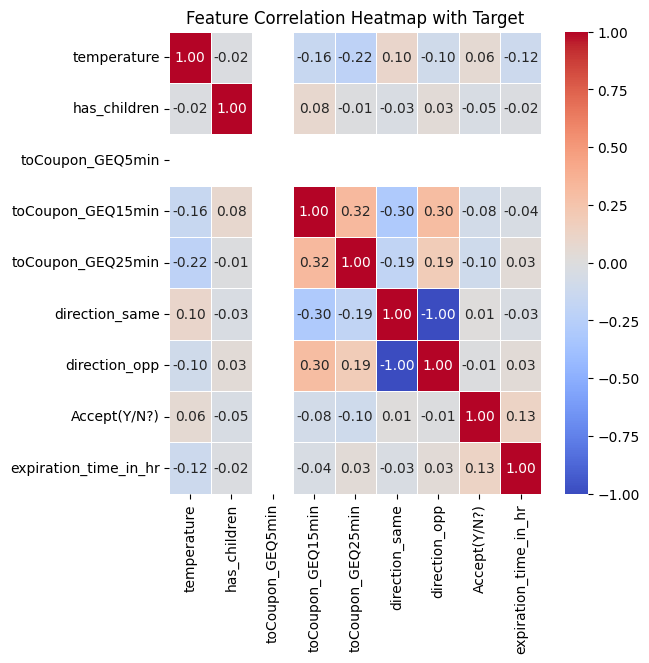

In [221]:
numerical_feature = df.select_dtypes(include = ['int64', 'float64'])
plt.figure(figsize=(6, 6))
correlation_matrix = numerical_feature.corr()

# Correlation Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap with Target')
plt.show()

In [222]:
print(df["toCoupon_GEQ5min"].value_counts())

toCoupon_GEQ5min
1    12684
Name: count, dtype: int64


In [223]:
# due to all values are same of the column "toCoupon_GEQ5min" so dropping it, and also dropping "direction_same" as both "direction_same" and "direction_opp" are inversely proportional
df.drop(['toCoupon_GEQ5min','direction_same'], axis=1, inplace=True)

In [224]:
# Now create a combined feature
df["time_to_coupon"] = df["toCoupon_GEQ15min"] + df["toCoupon_GEQ25min"]

# Drop the original columns
df.drop(["toCoupon_GEQ15min", "toCoupon_GEQ25min"], axis=1, inplace=True)

In [225]:
# Verify the new column
df["time_to_coupon"].head(50)
# 0 → No coupon in these times
# 1 → Coupon available in either 15 min or 25 min
# 2 → Coupon available in both

,time_to_coupon
0,0
1,0
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


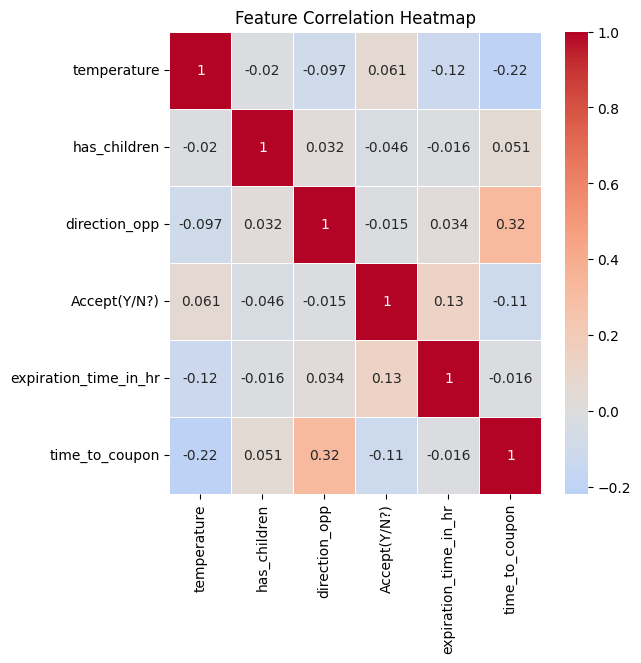

In [226]:
numerical_feature = df.select_dtypes(include = ['int64', 'float64'])
plt.figure(figsize=(6,6))
sns.heatmap(numerical_feature.corr(), annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

In [227]:
from scipy.stats import chi2_contingency
cat_cols = df.select_dtypes(include = 'object').columns  # filterout the categorical col

def chi_square_test(df, feature, target):
    contingency_table = pd.crosstab(df[feature], df[target])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return p  # Return p-value

# Apply to categorical columns
for col in cat_cols:
    p_val = chi_square_test(df, col, "Accept(Y/N?)")
    print(f"{col}: p-value = {p_val}")


destination: p-value = 8.40265678045787e-48
passanger: p-value = 7.284119805592145e-48
weather: p-value = 8.312207740720093e-31
coupon: p-value = 8.575341747082738e-188
gender: p-value = 8.05552865589407e-07
age: p-value = 3.5221422366296096e-11
maritalStatus: p-value = 6.489647983232487e-10
education: p-value = 6.858463266342188e-08
occupation: p-value = 1.0136827151270322e-14
income: p-value = 4.30446851198096e-08
Bar: p-value = 2.9357101375440645e-16
CoffeeHouse: p-value = 2.595109622059384e-58
CarryAway: p-value = 2.3653768752999535e-08
RestaurantLessThan20: p-value = 0.00010179181058169617
Restaurant20To50: p-value = 4.3160609619614744e-13


In [228]:
# as categorical features have less no. of unique columns so I perform one-hot encoding
df = pd.get_dummies(df, drop_first=True, dtype=int)

In [229]:
df.head()

,temperature,has_children,direction_opp,Accept(Y/N?),expiration_time_in_hr,time_to_coupon,destination_No Urgent Place,destination_Work,passanger_Friend(s),passanger_Kid(s),...,RestaurantLessThan20_4~8,RestaurantLessThan20_Missing,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_4~8,Restaurant20To50_Missing,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never
0,55,1,1,1,24,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,80,1,1,0,2,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,80,1,1,1,2,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,80,1,1,0,2,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,80,1,1,0,24,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [231]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [232]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "XGBoost": XGBClassifier(random_state=42, eval_metric='logloss'),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

In [233]:
def metrics_used(true, predicted):
  accuracy = accuracy_score(true, predicted)
  conf_matrix = confusion_matrix(true, predicted)
  class_report = classification_report(true, predicted)

  return accuracy, conf_matrix, class_report

In [234]:
X = df.drop('Accept(Y/N?)', axis=1)
y = df['Accept(Y/N?)']

In [235]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [237]:
print(y_train.value_counts(normalize=True))  # Class Imbalance Check

Accept(Y/N?)
1    0.571696
0    0.428304
Name: proportion, dtype: float64


In [238]:
print(X_train.select_dtypes(include='object').columns)  # Should return an empty Index

Index([], dtype='object')


In [239]:
X.columns = X.columns.astype(str)

In [241]:
# function to cleaned the column name
def clean_column_name(name):
  # Replace invalid characters with underscores
   return name.replace('[', '_').replace(']', '').replace('<','_').replace('>','_')

current_col_names = X_train.columns

# Apply the cleaning function to all column names
cleaned_column_names = [clean_column_name(name) for name in current_col_names]

# Assign the cleaned column names back to the DataFrame
X_train.columns = cleaned_column_names
X_test.columns = cleaned_column_names

In [242]:
# Function to evaluate models
def evaluate_models(name, y_true, y_pred):
  print(f"Model Name: {name}")
  accuracy, conf_matrix, class_report = metrics_used(y_true, y_pred)   # call metrics_used function
  print(f"Accuracy: {accuracy*100}")
  print("*"*30)
  print(f"Confusion Matrix:\n{conf_matrix}")
  print("*"*30)
  print(f"Classification Report:\n{class_report}")
  print("="*70)

In [243]:
for name, model in models.items():
  print(f"\n Training {name}...\n")
  model.fit(X_train.to_numpy(), y_train)  # Train model
  y_pred = model.predict(X_test.to_numpy())  # make prediction
  evaluate_models(name, y_test, y_pred)  # evaluate performance


 Training Random Forest...

Model Name: Random Forest
Accuracy: 73.70910524241229
******************************
Confusion Matrix:
[[ 714  414]
 [ 253 1156]]
******************************
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.63      0.68      1128
           1       0.74      0.82      0.78      1409

    accuracy                           0.74      2537
   macro avg       0.74      0.73      0.73      2537
weighted avg       0.74      0.74      0.73      2537


 Training XGBoost...

Model Name: XGBoost
Accuracy: 74.65510445407962
******************************
Confusion Matrix:
[[ 767  361]
 [ 282 1127]]
******************************
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.68      0.70      1128
           1       0.76      0.80      0.78      1409

    accuracy                           0.75      2537
   macro avg       0.74      0.74      0.

# Train the model without specific features

In [249]:
# Random Forest Model
rf = RandomForestClassifier(random_state=42)

# Hyperparameter Grid
param_grid = {
    'n_estimators': [50, 100, 150],           # Number of trees
    'max_depth': [None, 5, 20, 30],          # Maximum depth of trees
    'min_samples_split': [2, 5, 10],          # Minimum samples required to split
    'min_samples_leaf': [1, 2, 5],            # Minimum samples at leaf node
    'bootstrap': [True, False]                # Whether bootstrap samples are used
}

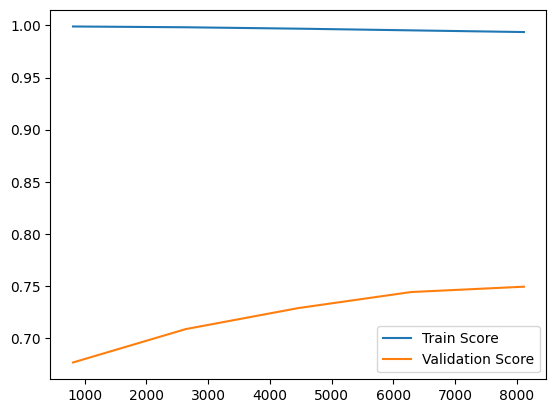

In [252]:
# Learning curve: To detect underfitting or overfitting

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), X_train, y_train, cv=5)

plt.plot(train_sizes, train_scores.mean(axis=1), label='Train Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation Score')
plt.legend()
plt.show()